The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


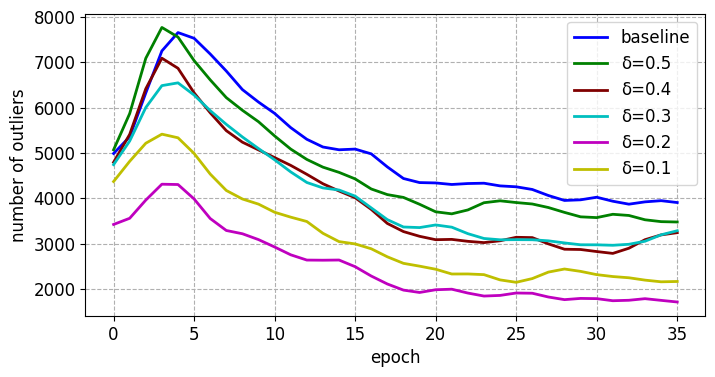

In [16]:
import json
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

def get_hard_sample(file_dir):
    f = open(file_dir, encoding="utf-8")
    lines = f.readlines()      #读取全部内容 ，并以列表方式返回
    hard_sample_number = []
    for line in lines:
        if "uncertainty < uncertainty_threshold:" in line:
            hard_sample_number.append(int(line.split(':')[-1].strip()))
    return hard_sample_number

naive = get_hard_sample('/home/linhuadong/CGPS/jobs/prw_part_context_0p1_5/work_dirs/prw/20221029_111859.log')
label_noise_0p5 = get_hard_sample('/home/linhuadong/CGPS/jobs/prw_part_context_outlier_0p5/work_dirs/prw/20221029_112140.log')
# label_noise_0p5 = get_hard_sample('/home/linhuadong/CGPS/jobs/prw_part_IoU_outlier_0p5/work_dirs/prw/20221022_133804.log')
label_noise_0p4 = get_hard_sample('/home/linhuadong/CGPS/jobs/prw_part_IoU_outlier_0p4/work_dirs/prw/20221029_131021.log')
label_noise_0p3 = get_hard_sample('/home/linhuadong/CGPS/jobs/prw_part_IoU_outlier_0p3/work_dirs/prw/20221029_131057.log')
label_noise_0p2 = get_hard_sample('/home/linhuadong/CGPS/jobs/prw_part_IoU_outlier_0p1/work_dirs/prw/20221030_210725.log')
label_noise_0p1 = get_hard_sample('/home/linhuadong/CGPS/jobs/prw_part_IoU_outlier_0p2/work_dirs/prw/20221030_210349.log')
label_noise_0p1 += [2100, 2200]

name = ["baseline",  "δ=0.5", "δ=0.4", "δ=0.3", "δ=0.2", "δ=0.1"]
lists = [naive, label_noise_0p5, label_noise_0p4, label_noise_0p3, label_noise_0p2, label_noise_0p1]
colors = ['b', 'g','maroon', 'c','m','y', 'k', 'r']
markers = ['o', 'v', '^', 'D', '>', 's', '*', '+']

plt.figure(figsize=(8, 4), dpi=100)
plt.grid(linestyle="--")  # 设置背景网格线为虚线

for i in range(6):
    y_smoothed = gaussian_filter1d(lists[i], sigma=1)
    plt.plot(range(len(lists[i])), y_smoothed, c=colors[i], label=name[i], linewidth=2)

plt.xticks(fontsize=12)  # 默认字体大小为10
plt.yticks(fontsize=12)
plt.xlabel("epoch", fontsize=12)
plt.ylabel("number of outliers", fontsize=12)


plt.legend(loc=0, prop = {'size':12})
# plt.savefig('./filename.jpg', format='jpg', bbox_inches='tight')  # 建议保存为svg格式,再用inkscape转为矢量图emf后插入word中
plt.savefig('./file/outliers.eps', dpi=100, format='eps', bbox_inches='tight', pad_inches=0)
plt.show()